# **ISSCC 2025 Code-a-Chip Challenge**
# **Automated Current Mirror OTA Design and Optimization: <br> From Specification to Layout**
## Author: Alec S. Adair - The University of Utah, Salt Lake City, UT

alecadair1@gmail.com, alec.adair@utah.edu, https://github.com/alecadair, https://www.linkedin.com/in/alecadair/

Please feel free to reach out!

**Work Licensed Under GPL 3.0**

Details of GPL 3.0 can be read in the LICENSE file of top level directory

---

Welcome to this **ISSCC 2025 Code-a-Chip Challenge** notebook! This notebook demonstrates a full specification to GDS automated design and optimization flow for an **8-transistor current mirror operational transconductance amplifier (OTA)** using the **C/ID method** coupled with the **ALIGN** analog layout generator. The C/ID methodology is an extension of the  gm/ID design methodology.
The C/ID methodology introduces an approach to provide technology-agnostic analytical circuit optimization with systematic convergence for process and temperature variation  (PVT) without the need for simulation or computational iteration. This approach enables high performance, rapid, robust, and optimal design with extremely low computational complexity without expensive compute hardware. When coupled with a layout generator such as ALIGN a fully automated flow from specification to layout can be realized. This notebook showcases a fully automated flow from specification to layout to verification with an 8 transistor current mirror OTA example using the C/ID methodology, ALIGN analog layout generator, and **Open Source Skywater130-A PDK**.

---
## **Notebook Overview**

This notebook is based on the methods and findings presented in the paper:

**"Analytical Optimization for Robust and Efficient Analog IC Design Automation"**  - *Currently under review for DAC 2025*

Authored by: *Alec Adair and Armin Tajalli*

The paper is currently under review for DAC 2025 and offers deeper insights into the theoretical and practical aspects of the C/ID methodology. It is highly encouraged to read this manuscript as supplemental material to this notebook.

[PDF Manuscript, Design Scripts, and Results Available Here](https://github.com/alecadair/DAC2025_ROAR)  

A PDF manuscript is also available in the same directory as this notebook and is called AnalyticalOptimization-OTA.pdf

**All design scripts in this flow are intended to be process and technology agnostic.**
**The open source Skywater130nm-A process is used for all results.**

C/ID is generally pronounced as "C over ID", but the author also encourages the colloquial use of the term "Inverse ID based design" to refer to gm/ID, C/ID, and other design metrics and methodologies that rely on the inverse of ID (1/ID) .

**This notebook includes:**

0. **Optimization automation and procedure to minimize current in a current mirror OTA and generate layout**
1. **OTA Design and Optimization Analysis Using C/ID equations derived from traditional design equations**: Key design specifications and constraints.
2. **C/ID-Based Optimization Workflow**: Step-by-step design methodology for CM OTA.
3. **Netlist Generation**: SPICE and ALIGN netlists for ideal spice simulation and layout generation.
4. **Layout Generation and Verification**: Layout generation with ALIGN and DRC, LVS, and netlist extraction using FOSS tools.
5. **Simulation and Analysis**: Performance evaluation for ideal and post layout simulations.

---

## **Requirements**

1. **Skywater130-A PDK** available at https://github.com/RTimothyEdwards/open_pdks.git <br>
    **This notebook and corresponding software relies on the pdk being installed at PDK_ROOT Environmental Variable**<br>
    This is the same convetion and in line with other open source tools such as xschem when designing with skywater130.
2. **ALIGN Analog Layout Generator** with schematic2layout.py in PATH environment variable - this notebook can also install, but takes a while.
3. **ngspice** in PATH environment variable
4. **magic** in PATH environment variable
5. python3
---

## **Current Mirror OTA Topology**

<img src="images/fig_ota_schematic.png" alt="OTA Topology" style="width: 30%; display: block; margin: auto;">

---

This notebook is based on the methods and findings presented in the paper:

**"Analytical Optimization for Robust and Efficient Analog IC Design Automation"**  - *Currently under review for DAC 2025*

Authored by: *Alec Adair and Armin Tajalli*

The paper is currently under review for DAC 2025 and offers deeper insights into the theoretical and practical aspects of the C/ID methodology. It is highly encouraged to read this manuscript as supplemental material to this notebook.

[PDF Manuscript, Design Scripts, and Results Available Here](https://github.com/alecadair/DAC2025_ROAR)  


**All design scripts in this flow are intended to be process and technology agnostic.**
**The open source Skywater130nm-A process is used for all results.**

C/ID is generally pronounced as "C over ID", but the author also encourages the colloquial use of the term "Inverse ID based design" to refer to gm/ID, C/ID, and other design metrics and methodologies that rely on the inverse of ID (1/ID) .

---

## **General Flow**

<p align="center">
  <img src="images/fig_flowchart_dac.png" alt="Flow Diagram" style="width: 35%;">
</p>

This notebook provides specification to layout functionality for end-to-end design and verification, including:

0. **LUT Generation**: C/ID is a Lookup Table (LUT) based flow
1. **Analytical Design and Optimization Analysis**: Analytical optimization can be done with many topologys using C/ID
2. **SPICE Netlist Generation**: Generates a SPICE netlist for simulation using `ngspice`.
2. **Layout Generation with Skywater 130nm A Process and ALIGN**: The design is based on the Skywater 130nm A process.
3. **Simulation and Verification**: Ensure functionality 

This notebook follows these steps in order and as outlined in the flow chart diagram above.

---

Feel free to explore, modify, and adjust the specifications and code to adapt it to your specific requirements.

I hope to be a part of the growing movement in the democritization of silicon and open source design while continuing to innovate and optimize the analog IC design flow with you all in this vibrant and passionate community. I truly believe the work this community has done is important for political, technological, academic, and industrial reasons and will benefit humanity in much of the same way Linux and other open source projects have. I hope this is an opportunity for myself to collaborate further with you all and build something special, meaningful, and impactful. I thank you all for your work, passions, inspiration, and contributions to the growing eco-system that this community of IC designers has built.

---

## **Tool Installation**

Install needed python libraries to run the flow

In [1]:
# Update pip 
!pip install --upgrade pip

In [2]:
# Install needed python libraries
!pip install matplotlib
!pip install pandas
!pip install jupyterlab-latex
!pip install jupyter-contrib-nbextensions
!pip install pillow
#!pip install gdstk
#!pip install cairosvg
#!pip install svglib
#!pip install cffi==1.15.1
#!pip install --upgrade cffi==1.15.1

In [1]:
# Needed libraries for ALIGN
!pip install colorlog
!pip install pydantic==1.10.18
!pip install z3
!pip install networkx
!pip install flatdict
!pip install python-gdsii
!pip install gdspy
!pip install plotly

  Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
=1.10.18: No such file or directory.
  Using cached z3-0.2.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Using cached boto-2.49.0-py2.py3-none-any.whl (1.4 MB)
  Created wheel for z3: filename=z3-0.2.0-py3-none-any.whl size=26637 sha256=eddbffe42751baa168c7a3e084d4a628eb6a589587d0ac8d0e2047e6f614c0bd
  Stored in directory: /pri/ala1/.cache/pip/wheels/5b/58/76/3276af56088d401a2ab36c94cfb1adf153d56a90bf69faba1b
Successfully built z3
  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Using cached flatdict-4.0.1.tar.gz (8.3 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for flatdict: filename=flatdict-4.0.1-py3-none-any.whl size=6946 sha256=20699eb11e87cdd3cdd5a5fe8c694ef85160add0

  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)


## Clone Current Mirror OTA Synthesis Repository

This Repository contains scripts, templates, and characterizations to run the flow in this notebook.

In [8]:
!rm -rf CM-OTA-Synthesis
!git clone https://github.com/alecadair/CM-OTA-Synthesis

Cloning into 'CM-OTA-Synthesis'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 247 (delta 32), reused 244 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (247/247), 9.99 MiB | 5.85 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [3]:
#
# If ALIGN is already installed on your system this cell may be skipped.
# schematic2layout.py must be in your $PATH environmental variable
#

# Install ALIGN Layout Generator - This installation takes quite a long time to compile with about 322 modules being built and compiled.
# This installation takes about 1GB of storage space. Please be patient while it runs.
# The installation process also has very long output logging.


#!rm -rf ALIGN-public
#!git clone https://github.com/ALIGN-analoglayout/ALIGN-public
#!pip install -v ./ALIGN-public


In [9]:
# Import basic libraries and matplotlib graphing libraries
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys, os, getpass, shutil, operator, collections, copy, re, math
import matplotlib.ticker as mticker
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties

plt.rcParams['svg.fonttype'] = 'none'

# Import gds viewer libraries
#import gdstk
#from wand.image import Image
#import cairosvg
#from svglib.svglib import svg2rlg
#from reportlab.graphics import renderPM
from IPython.display import Image


# Set global variables for software
ROAR_HOME = "./CM-OTA-Synthesis"
ROAR_LIB = ROAR_HOME + "/lib"
ROAR_SRC = ROAR_HOME + "/src"
ROAR_CHARACTERIZATION = ROAR_HOME + "/characterization"
ROAR_DESIGN = ROAR_HOME + "/design"
sys.path.append(ROAR_SRC)
from cid import *


## **Lookup Table Generation**

This step is optional in the flow. Lookup tables for the Skywater130A process come pre-packaged in the characterization/sky130 directory.
Running the following cell will recreate the lookup tables in this directory and results may be different than what is tested.

**When initially running this notebook is recommended to not recreate lookup tables.**
**By default the function call at the bottom of this cell "create_lookup_tables("SKY130")" to generate the lookup tables is commented out. This can be uncommented to run lookup table generation.**

---


In [10]:
def create_netlist_from_template(netlist_template, length, corner, temperature):
    if os.path.exists(netlist_template):
        with open(netlist_template, 'r') as net_temp:
            netlist_data = net_temp.read()
        length_str = str(length)
        netlist_data = netlist_data.replace("_LENGTH", length_str)
        netlist_data = netlist_data.replace("_CORNER", corner)
        netlist_data = netlist_data.replace("_TEMPERATURE", temperature)
        return netlist_data

# Netlist parsing line.
def fix_data_line(text):
    # Remove leading spaces from each line
    text = re.sub(r'^\s+', '', text, flags=re.MULTILINE)

    # Replace one or more spaces with a single comma, but keep newline characters
    text = re.sub(r'[ \t]+', ',', text)

    return text

#
# Top level function call for lookup table creation
# This function creates a directory with a hierarchy of lookup tables.
# The hierarchy model->length->lookup csv file.
# The following tree shows the example of the file structure created
#
# LUTs_SKY130/
# ├── n_01v8
# │   ├── LUT_N_1000
# │   │   ├── nfetff-25.csv
# │   │   ├── nfetff27.csv
# │   │   ├── nfetff75.csv
# │   │   ├── nfetss-25.csv
# │   │   ├── nfetss27.csv
# │   │   ├── nfetss75.csv
# │   │   ├── nfettt-25.csv
# │   │   ├── nfettt27.csv
# │   │   └── nfettt75.csv
# │   ├── LUT_N_150
# │   │   ├── nfetff-25.csv
# │   │   ├── nfetff27.csv
# │   │   ├── nfetff75.csv
#
def create_lookup_tables(tech_name=""):
    pdk = "sky130"
    luts_dir = "LUTs_" + tech_name
    netlists_dir = "netlists_" + tech_name
    if os.path.exists(luts_dir):
        shutil.rmtree(luts_dir)
    os.system("mkdir " + luts_dir)

    # List of skywater devices to be characterized
    # Default is Regular-threshold 1.8 V devices
    models = ["01v8"]

    nfet = "nfet"
    pfet = "pfet"

    # Define temperatures and corners to be characterized
    # Defaults is slow slow, typical typical, and fast fast corners
    # With Temperatures of -25, 25, and 75 degrees Celsius
    ss = "ss"
    tt = "tt"
    ff = "ff"

    corners = [ss, tt, ff]

    cold = "-25"
    room = "25"
    hot = "75"

    temperatures = [cold, room, hot]

    nsscold = nfet + ss + cold
    nttcold = nfet + tt + cold
    nffcold = nfet + ff + cold
    nssroom = nfet + ss + room
    nttroom = nfet + tt + room
    nffroom = nfet + ff + room
    nsshot = nfet + ss + hot
    ntthot = nfet + tt + hot
    nffhot = nfet + ff + hot

    psscold = pfet + ss + cold
    pttcold = pfet + tt + cold
    pffcold = pfet + ff + cold
    pssroom = pfet + ss + room
    pttroom = pfet + tt + room
    pffroom = pfet + ff + room
    psshot = pfet + ss + hot
    ptthot = pfet + tt + hot
    pffhot = pfet + ff + hot

    # List of lengths to be characterized in micrometers
    # This list can be edited for lengths of interest
    lengths = [".150", ".200", ".250", ".300", ".500", "1.000"]


    # List of corners to be characterized
    ncorners = [nsscold, nttcold, nffcold,
                nssroom, nttroom, nffroom,
                nsshot, ntthot, nffhot]

    pcorners = [psscold, pttcold, pffcold,
                pssroom, pttroom, pffroom,
                psshot, ptthot, pffhot]


    run_n = True
    run_p = True

    netlists_dir = "netlists"
    netlist_mkdir = "mkdir " + netlists_dir
    if not os.path.exists(netlists_dir):
        os.system(netlist_mkdir)

    netlist_template_file = "characterization/char_template.cir"
    for model in models:
        n_model = "n_" + model
        p_model = "p_" + model
        n_model_dir = luts_dir + "/" + n_model
        p_model_dir = luts_dir + "/" + p_model
        if run_n == True:
            if os.path.exists(n_model_dir):
                shutil.rmtree(n_model_dir)
            os.system("mkdir " + n_model_dir)
        if run_p == True:
            if os.path.exists(p_model_dir):
                shutil.rmtree(p_model_dir)
            os.system("mkdir " + p_model_dir)
        for length in lengths:
            length_str = str(length.replace(".", ""))
            n_length_dir = n_model_dir + "/LUT_N_" + str(length_str)
            p_length_dir = p_model_dir + "/LUT_P_" + str(length_str)
            if run_n == True:
                if os.path.exists(n_length_dir):
                    shutil.rmtree(n_length_dir)
                os.system("mkdir " + n_length_dir)
            if run_p == True:
                if os.path.exists(p_length_dir):
                    shutil.rmtree(p_length_dir)
                os.system("mkdir " + p_length_dir)
            for corner in corners:
                for temp in temperatures:
                    print("Creating netlist...")
                    edited_netlist = create_netlist_from_template(netlist_template=netlist_template_file, length=length, corner=corner, temperature=temp)
                    netlist_name = model + "_" + length + "_" + corner + "_" + temp + ".cir"
                    corner_name = corner+temp
                    with open(netlist_name, 'w') as file:
                        file.write(edited_netlist)
                    print("Running characterization...")
                    os.system("ngspice -b -n " + netlist_name)
                    if os.path.exists(n_length_dir) and os.path.exists("nfet_cid_characterization.csv"):
                        with open("nfet_cid_characterization.csv", 'r') as file:
                            lines = file.readlines()
                        with open("nfet_cid_characterization.csv", 'w') as file:
                            for i, line in enumerate(lines):
                                line = fix_data_line(line)
                                if i == 0:
                                    #file.write(line.rstrip('\n') + ",W,L,pdk\n")
                                    file.write(line)
                                else:
                                    #file.write(line.rstrip('\n') + "0.42," + str(length) + "," + pdk + "\n")
                                    file.write(line.rstrip('\n') + "0.840," + str(length) + "," + pdk + "\n")
                        with open("pfet_cid_characterization.csv", 'r') as file:
                            lines = file.readlines()
                        with open("pfet_cid_characterization.csv", 'w') as file:
                            for i, line in enumerate(lines):
                                line = fix_data_line(line)
                                if i == 0:
                                    file.write(line)
                                    #file.write(line.rstrip('\n') + ",W,L,pdk,\n")
                                else:
                                    #file.write(line.rstrip('\n') + "0.42," + str(length) + "," + pdk + "\n")
                                    file.write(line.rstrip('\n') + "0.840," + str(length) + "," + pdk + "\n")
                        os.system("mv nfet_cid_characterization.csv " + n_length_dir + "/nfet" + corner_name + ".csv")
                    if os.path.exists(n_length_dir) and os.path.exists("pfet_cid_characterization.csv"):
                        os.system("mv pfet_cid_characterization.csv " + p_length_dir + "/pfet" + corner_name + ".csv")
                    os.system("mv " + netlist_name + " netlists")
    os.system("mv " + luts_dir + "CM-OTA-Synthesis/characterization/sky130")
    
# Uncomment the following line of code to generate lookup tables                    
#create_lookup_tables("SKY130")
print("Lookup Tables Generated")
!tree ./CM-OTA-Synthesis/characterization/sky130/LUTs_SKY130

Lookup Tables Generated
./CM-OTA-Synthesis/characterization/sky130/LUTs_SKY130
├── n_01v8
│   ├── LUT_N_1000
│   │   ├── nfetff-25.csv
│   │   ├── nfetff27.csv
│   │   ├── nfetff75.csv
│   │   ├── nfetss-25.csv
│   │   ├── nfetss27.csv
│   │   ├── nfetss75.csv
│   │   ├── nfettt-25.csv
│   │   ├── nfettt27.csv
│   │   └── nfettt75.csv
│   ├── LUT_N_150
│   │   ├── nfetff-25.csv
│   │   ├── nfetff27.csv
│   │   ├── nfetff75.csv
│   │   ├── nfetss-25.csv
│   │   ├── nfetss27.csv
│   │   ├── nfetss75.csv
│   │   ├── nfettt-25.csv
│   │   ├── nfettt27.csv
│   │   └── nfettt75.csv
│   ├── LUT_N_200
│   │   ├── nfetff-25.csv
│   │   ├── nfetff27.csv
│   │   ├── nfetff75.csv
│   │   ├── nfetss-25.csv
│   │   ├── nfetss27.csv
│   │   ├── nfetss75.csv
│   │   ├── nfettt-25.csv
│   │   ├── nfettt27.csv
│   │   └── nfettt75.csv
│   ├── LUT_N_250
│   │   ├── nfetff-25.csv
│   │   ├── nfetff27.csv
│   │   ├── nfetff75.csv
│   │   ├── nfetss-25.csv
│   │   ├── nfetss27.csv
│   │   ├── nfetss75.csv
│

## **Storing The Lookup Tables and Performing Lookups**

This notebook provides custom code and objects for storing lookup tables and performing lookups. This code is in the src/cid.py file. The main object for storing LUTs and performing lookups is called a CIDCorner. The CIDCorner object represents one corner of characterization lookup table from a csv file generated in the previous cell. The CIDCorner stores a lookup table as a pandas data frame from a lookup csv file. The CIDCorner contains functionality for performing lookups with interprebility, meaning an arbitrary value can be looked up and interpololation of data is done on for the lookup.

A CIDCollection object contains a set of CIDCorner objects and also has lookup functionality. When doing a lookup from a CIDCollection object a vector of lookup values is returned instead of a scalar. Each value in the vector represents a respective lookup from a CIDCorner.

---


In [11]:
# Variable for base directory of LUTs
lut_dir = ROAR_CHARACTERIZATION

print("Lookup Tables Stored in " + lut_dir)
# The CIDCorner object provides functionality for storing lookup tables from csv characterization files generated in the cell above.
# This object also provides functionality for interpolated lookups as well as graphing parameters. 

# Define CIDCorner objects for -25, 25, and 75 degree temperature characterizations for nfet and pfet devices 
nfet_nominal = CIDCorner(corner_name="nfet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/n_01v8/LUT_N_500/nfettt25.csv",
                             vdd=1.8)

pfet_nominal = CIDCorner(corner_name="pet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/p_01v8/LUT_P_500/pfettt25.csv",
                             vdd=1.8)

nfet_cold = CIDCorner(corner_name="nfet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/n_01v8/LUT_N_500/nfettt-25.csv",
                             vdd=1.8)

pfet_cold = CIDCorner(corner_name="pet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/p_01v8/LUT_P_500/pfettt-25.csv",
                             vdd=1.8)

nfet_hot = CIDCorner(corner_name="nfet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/n_01v8/LUT_N_500/nfettt75.csv",
                             vdd=1.8)

pfet_hot = CIDCorner(corner_name="pfet_500n_nominal",
                             lut_csv=lut_dir + "/sky130/LUTs_SKY130/p_01v8/LUT_P_500/pfettt75.csv",
                             vdd=1.8)

# A CIDCollection object is a collection of CIDCorners with lookup functionality 
# returning a vector instead of a scalar. When doing a lookup using a CIDDevice object 
# a vector of values is returned with each value representing one corner's lookup. The CIDDevice

#nfet_device = CIDCornerCollection(device_name="nfet_150n", vdd=1.8,
#                            lut_directory=lut_dir + "/sky130/LUTs_SKY130/n_01v8/LUT_N_500",
#                            corner_list=None)
#pfet_device = CIDCornerCollection(device_name="pfet_150n", vdd=1.8,
#                            lut_directory=lut_dir + "/sky130/LUTs_SKY130/p_01v8/LUT_P_500",
#                            corner_list=None)

print("Lookup Table CID Objects created")

Lookup Tables Stored in ./CM-OTA-Synthesis/characterization
Lookup Table CID Objects created


## **Analytical OTA Analysis and Objective Function Derivation**
---
<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px; justify-items: center; align-items: center;">
  <div style="background-color: white; padding: 5px; display: inline-block;">
    <img src="images/analysis_page1.png" alt="Analysis Page1" 
         style="width: 110%; display: block; margin: auto; border: 2px solid black;">
  </div>
  <div style="background-color: white; padding: 5px; display: inline-block;">
    <img src="images/analysis_page2.png" alt="Analysis Page2" 
         style="width: 110%; display: block; margin: auto; border: 2px solid black;">
  </div>
  <div style="background-color: white; padding: 5px; display: inline-block;">
    <img src="images/analysis_page3.png" alt="Analysis Page3" 
         style="width: 110%; display: block; margin: auto; border: 2px solid black;">
  </div>
  <div style="background-color: white; padding: 5px; display: inline-block;">
    <img src="images/analysis_page4.png" alt="Analysis Page4" 
         style="width: 110%; display: block; margin: auto; border: 2px solid black;">
  </div>
</div>

---

## **Python Function Definition for Objective Function**

The following function defines the objective function in Equation 25 from the analytical analysis in the cell above. This function takes in a two CIDCorner objects for N and P value lookups as well as values for gm/ID for the N and P devices to be evaluated at. In addition to this it takes alpha as a parameter. Alpha defines the stability criterion as shown in Equation 14 in the analysis. 

This function also takes a gain-bandwidth product specification gbw in Hz, capactive loading specification cload in Farads, gain specification in volts/volt, and an optional thermal noise specification.

In all codes, parameters that are divided by ID are denoted with prefix k. I.E. gm/ID = kgm, cgs/ID = kcgs 


In [12]:
#
# The following function represents the objective function to be minimized.
# This function calculates the total current of the OTA.
# In the analysis above, Equation 25 represents the standard form objective function to be minimized and optimized on.
#
def total_current_ota(ncorner, pcorner, kgm_n, kgm_p, alpha, gbw, cload, gain_spec, thermal_noise_spec=0):
    
    # Set physical constants and define f1 - unity gain frequency
    f1 = 2*math.pi*gbw
    k = 1.380649e-23
    T = 300.15
    gamma = 8/3
    kgm1 = kgm_n
    kgm2 = kgm_n
    kgm5 = kgm_n
    kgm6 = kgm_n
    kgm3 = kgm_p
    kgm4 = kgm_p
    kgm7 = kgm_p
    kgm8 = kgm_p
    
    # Perform lookups for design invariants (gm/id, c/id)
    kcgs_1 = ncorner.lookup(param1="kgm", param2="kcgs", param1_val=kgm1)
    kcds_1 = ncorner.lookup(param1="kgm", param2="kcds", param1_val=kgm1)
    kcgs_8 = pcorner.lookup(param1="kgm", param2="kcgs", param1_val=kgm8)
    kcgd_8 = pcorner.lookup(param1="kgm", param2="kcgd", param1_val=kgm8)
    kcds_8 = pcorner.lookup(param1="kgm", param2="kcds", param1_val=kgm8)
    kcgs_6 = ncorner.lookup(param1="kgm", param2="kcgs", param1_val=kgm6)
    kcgd_6 = ncorner.lookup(param1="kgm", param2="kcgd", param1_val=kgm6)
    kcds_6 = ncorner.lookup(param1="kgm", param2="kcds", param1_val=kgm6)
    kcgs_4 = pcorner.lookup(param1="kgm", param2="kcgs", param1_val=kgm4)
    kcds_4 = pcorner.lookup(param1="kgm", param2="kcds", param1_val=kgm4)
    kgds_6 = ncorner.lookup(param1="kgm", param2="kgds", param1_val=kgm6)
    kgds_8 = ncorner.lookup(param1="kgm", param2="kgds", param1_val=kgm8)

    # Calculate gain, Kco, Beta, and total current from equations in analysis
    gain = kgm1/(kgds_6 + kgds_8)
    kcout = kcgd_8 + kcds_8 + kcgd_6 + kcds_6
    beta_num = kgm4 - 2*math.pi*alpha*gbw*kcgs_4
    beta_denom = (2*math.pi*alpha*gbw*(kcgs_8 + kcgd_8))
    beta = beta_num/beta_denom
    kcs_8 = kcgs_8 + kcgd_8
    kcs_6 = kcds_6 + kcgs_6
    total_current_num = alpha*cload*f1*f1*(kcs_8 - kcgs_4) + f1*cload*kgm4
    total_current_denom = (kgm4 - alpha*f1*kcgs_4)*(kgm1 - f1*kcout)
    total_current = total_current_num/total_current_denom
    
    # Multiply total current by 2 since this equation represents half-circuit model
    ota_total_current = total_current*2

    # Calculate currents and parameters for individual devices
    m1_current = total_current/(1 + beta)
    m8_current = total_current - m1_current
    m6_current = m8_current
    m4_current = m1_current
    m2_cload = (kcgs_1 + kcds_1)*m1_current + kcs_8*m8_current + kcds_4*m1_current
    m4_cload = m2_cload
    m6_cload = ((kcs_6 + kcds_8 + kcgs_8)*m6_current) + cload
    m8_cload = m6_cload
    m1_gm = kgm1*m1_current
    m6_gm = kgm2*m6_current
    m8_gm = m6_gm
    m4_gm = m1_gm
    ft_m8 = m8_gm/(2*math.pi*m8_cload)
    ft_m2 = m1_gm/(2*math.pi*m2_cload)
    ft_m4 = m4_gm/(2*math.pi*m4_cload)
    ft_m6 = m6_gm/(2*math.pi*m6_cload)

    # Calculate the thermal noise for the OTA
    thermal_rms_noise = k*T*(ft_m2/(kgm1*m1_current) + ft_m4/(kgm1*m1_current) + ft_m6/(kgm2*m6_current) + ft_m8/(kgm2*m6_current))

    # Check if calculation is valid, passes specification, and is in the constrained solution space
    beta_valid = True
    gain_valid = True
    thermal_noise_valid = True
    if beta < 1:
        beta_valid = False
    if gain < gain_spec:
        gain_valid = False
    if thermal_rms_noise < thermal_noise_spec:
        thermal_noise_valid = False
        
    # Return currents, beta, kcout, gain, and validity of evaluation in solution space
    return total_current, m1_current, m6_current, beta, kcout, gain, thermal_rms_noise, beta_valid, gain_valid, thermal_noise_valid, kcout

---
## **Visualizing the Solution Space with Specifications and Constraints Applied**

Since the objective function is a 3 dimensional function with two independent variables, it can be visualized using a 3D plot.
The following code shows the current consumption for the OTA across the gm/ID space for the three different temperature corners defined above. The specification for the OTA is the following

Gain Bandwidth Product (Unity Gain Frequency): 100MHz

Capactive Load: 4pF

Phase Margin: > 60°

Gain: > 50 V/V (~34dB)


In [13]:
# Set minimum, bandwidth and gain-bandwidth product, and capacitve loading specification
av= 50
bw = 2e6
gbw = bw * av
cload = 4e-12
thermal_noise = 500e-9

# Set Stability Criterion
tan_thirty = math.tan(30*math.pi/180)
alpha = 1/tan_thirty
two_pi_alpha_gbw = 2*math.pi*alpha*gbw
f2 = alpha*gbw

In [16]:
# Define function to do plotting for one corner 
def plot_solution_space_cm_ota(lookup_ncorner, lookup_pcorner, alpha, gain, bw, cload, therm_noise, fig, ax1, ax2, ax3, ax4,
                                         color_map, beta_color, gain_color, alpha_graph, alpha_region, hatch_mark, marker_size, line_style,
                                         kgm_n_max, kgm_p_max, map_label, edge_color, legend_str, num_samples):
    gbw = gain*bw
    kgm_n_v = lookup_ncorner.df["kgm"]
    kgm_p_v = lookup_pcorner.df["kgm"]
    max_n = max(kgm_n_v)
    max_p = max(kgm_p_v)
    min_n = min(kgm_n_v)
    min_p = min(kgm_p_v)
    kgm_min = min(min_n, min_p)
    kgm_max = max(max_n, max_p)
    current_max = 5000
    current_min = 120
    kgm_min = 0.1
    if kgm_min < 0:
        kgm_min = 0.001
    kgm_min = 0.1
    kgm_max = 26.5
    kgm_vals = np.linspace(kgm_min, kgm_max, num_samples)
    kgm1_grid, kgm2_grid = np.meshgrid(kgm_vals, kgm_vals)
    z = np.zeros_like(kgm1_grid)
    z_log = np.zeros_like(kgm1_grid)
    kcout = np.zeros_like(kgm1_grid)
    kcout_log = np.zeros_like(kgm1_grid)
    gain_v_v = np.zeros_like(kgm1_grid)
    gain_db = np.zeros_like(kgm1_grid)
    beta = np.zeros_like(kgm1_grid)
    beta_valid_grid = np.zeros_like(kgm1_grid)
    gain_valid_grid = np.zeros_like(kgm1_grid)
    kco_max = 1e-05
    if map_label:
        kgm_init_n_max = kgm_n_max
        kgm_init_p_max = kgm_p_max
    for i in range(len(kgm_vals)):
        for j in range(len(kgm_vals)):
            total_current, m1_current_i_j, m6_current_i_j, beta_i_j, kcout_i_j, gain_i_j, thermal_rms_noise_i_j,beta_valid_i_j, gain_valid, thermal_noise_valid, kc_out = total_current_ota(lookup_ncorner, lookup_pcorner, kgm_vals[i], kgm_vals[j],
                                                                                                                                                                                            alpha, gbw, cload, gain_spec=gain, thermal_noise_spec=therm_noise)
            if kgm_vals[j] > kgm_p_max:
                total_current = -1
                #kcout_i_j = np.nan
            if kgm_vals[i] > kgm_n_max:
                total_current = -1
                #kcout_i_j = np.nan
            total_current = total_current * 1e6
            gain_db_i_j = 20*math.log10(gain_i_j)
            if total_current < current_min:
                total_current = np.nan
                gain_i_j = np.nan
                gain_db_i_j = np.nan
                gain_valid = False
            if total_current > current_max:
                total_current = current_max
            if kcout_i_j > kco_max or kgm_vals[j] > 18.8 or kgm_vals[i] > 26.26:
                kcout_i_j = np.nan

            z[i, j] = total_current
            z_log[i, j] = math.log10(total_current)
            kcout[i, j] = kcout_i_j
            kcout_log[i, j] = math.log10(kcout_i_j)

            gain_valid_grid[i, j] = gain_valid
            gain_v_v[i, j] = gain_i_j
            gain_db[i, j] = gain_db_i_j
            beta_valid_grid[i, j] = beta_valid_i_j

    arial_bold = FontProperties(fname="CM-OTA-Synthesis/src/fonts/ArialNarrow/arialnarrow_bold.ttf")
    font_size = 12
    current_vals = [kgm_vals, z]
    gain_vals = [kgm_vals, gain_v_v]
    kco_vals = [kgm_vals, kcout]
    current_ticks = np.array([100, 250, 500, 1000, 2500, 5000])
    surf_i_total = ax1.plot_surface(kgm1_grid, kgm2_grid, z_log, lw=0.5, cmap=color_map, edgecolor=edge_color, rstride=3, cstride=3, alpha=alpha_graph, label=legend_str)
    if map_label:
        ax1.set_xlabel('gm/ID PFETs [1/V]', font=arial_bold, fontsize=font_size)
        ax1.set_ylabel('gm/ID NFETs [1/V]', font=arial_bold, fontsize=font_size)
        ax1.set_zlabel("Total Current [uA]", font=arial_bold, fontsize=font_size)
        ax1.xaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
        ax1.yaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
        ax1.zaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
        ax1.set_zticks(np.log10(current_ticks))
        ax1.set_zticklabels(current_ticks)
        ax1.set_xlim(kgm_min, kgm_p_max)
        ax1.set_ylim(kgm_min, kgm_n_max)
        ax1.set_zlim(2, 3.9)

    surf_kco_total = ax3.plot_surface(kgm1_grid, kgm2_grid, kcout_log, lw=0.5, cmap=color_map, edgecolor=edge_color, rstride=3, cstride=3, alpha=alpha_graph)
    def log_tick_formatter(val, pos=None):
        exponent = int(np.log10(val))
        return f"$10^{{{exponent}}}$" # remove int() if you don't use MaxNLocator

    ax3.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    ax3.set_xlabel('gm/ID PFETs [1/V]', font=arial_bold, fontsize=font_size)
    ax3.set_ylabel('gm/ID NFETs [1/V]', font=arial_bold, fontsize=font_size)
    ax3.set_zlabel('Cout/ID6,8 [F/A]', font=arial_bold, fontsize=font_size)

    kco_ticks = np.array([1e-11, 1e-9, 1e-7, 1e-05])
    ax3.set_zticks(np.log10(kco_ticks))
    ax3.set_zticklabels(kco_ticks)
    if map_label:
        ax3.set_xlim(kgm_min, kgm_p_max)
        ax3.set_ylim(kgm_min, kgm_n_max)
    ax3.xaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    ax3.yaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    ax3.zaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    surf_gain_total = ax4.plot_surface(kgm1_grid, kgm2_grid, gain_v_v, lw=0.5, cmap=color_map, edgecolor=edge_color, rstride=3, cstride=3, alpha=alpha_graph)
    def log_tick_formatter(val, pos=None):
        return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    ax4.set_xlabel('gm/ID PFETs [1/V]', font=arial_bold, fontsize=font_size)
    ax4.set_ylabel('gm/ID NFETs [1/V]', font=arial_bold, fontsize=font_size)
    ax4.set_zlabel('DC Gain [V/V]', font=arial_bold, fontsize=font_size)
    ax4.xaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    ax4.yaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    ax4.zaxis._axinfo['grid'].update(color='gray', linestyle='--', linewidth=0.5)
    if map_label:
        ax4.set_xlim(kgm_min, kgm_p_max)
        ax4.set_ylim(kgm_min, kgm_n_max)
    beta_false_mask = beta_valid_grid == False
    gain_false_mask = gain_valid_grid == False
    gain_false_mask = gain_valid_grid == False
    contour2 = ax2.contourf(kgm1_grid, kgm2_grid, z_log, levels=10, alpha=alpha_graph, cmap=color_map)
    ax2.set_xlabel('gm/ID PFETs [1/V]', font=arial_bold, fontsize=font_size)
    ax2.set_ylabel('gm/ID NFETs [1/V]', font=arial_bold, fontsize=font_size)
    # Add gridlines for better readability
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
    cbar4 = fig.colorbar(contour2, ax=ax2, shrink=0.33)
    cbar4.set_ticks(np.log10(current_ticks))
    cbar4.set_ticklabels(current_ticks)
    if map_label:
        ax2.set_ylim(kgm_min, kgm_n_max)
        ax2.set_xlim(kgm_min, kgm_p_max)
        #ax2.invert_xaxis()
    ax2.set_ylim(0.1, 26.26)
    ax2.set_xlim(0.1, 18.8)
    cbar4.set_label(legend_str, font=arial_bold, fontsize=font_size)
    return current_vals, gain_vals, kco_vals, gain_false_mask

# returns true if all num1, num2, and num3 are within difference diff of eachother
# diff default is 5%
def number_convergence(num1, num2, num3, diff=0.05):
    #mean = (num1 + num2 + num3)/3
    if num1 == np.nan or num2 == np.nan or num3 == np.nan:
        return False
    def within_diff(a, b):
        ratio = abs(a - b) / max(abs(a), abs(b))
        converge = ratio <= diff
        return converge
    converged = False
    converged1 = within_diff(num1, num2)
    converged2 = within_diff(num2, num3)
    converged3 = within_diff(num1, num3)
    if converged1 and converged2 and converged3:
        converged = True
    return converged

/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:107: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/pri/ala1/Documents/CAD_Custom_Scripts/python/venv/lib64/python3.6/site-packages/ipy

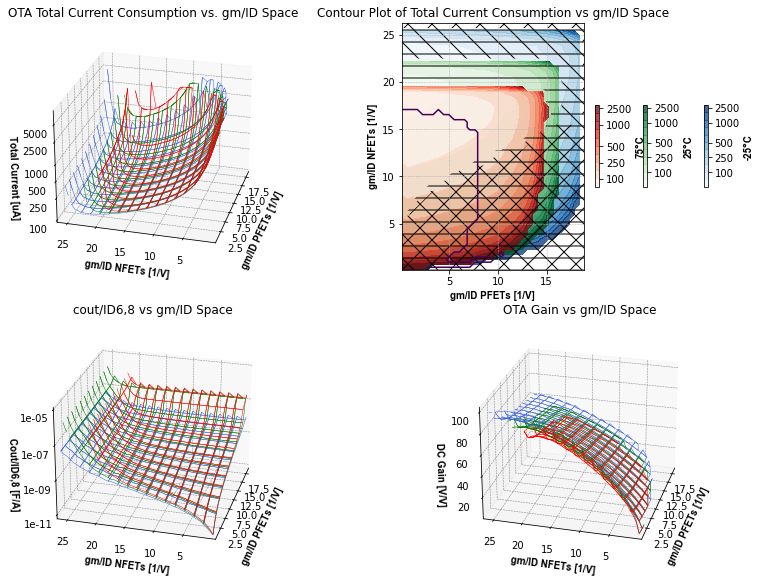



The current consumption graphs are assuming a half-circuit model.
This current must be doubled to account for the entire current consumption of the OTA.



In [17]:
# Define the number of samples to be taken in the x and y dimension for the objective function.
# 50 gives a reasonable balance between resolution and evaluation. To visualize the design space
# num_samples*num_samples need to be taken, this can take a little while to compute (one or two minutes for 70 samples)
num_samples = 50

# Create plotting objects, set colors, and create arrays for results
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
color_map_list = ["Blues", "Greens", "Reds"]
beta_color_list = ["b", "g", "r"]
line_style_list = ["r-", "g-", "b-.", "m-", "c-.", "r--", "b--", "g--", "m--"]
alpha_graph = 0.77
marker_size = 40
current_vectors = []
kgm_vectors = []
kgm_n = [26.26, 26.26, 26.26]
kgm_p = [18.8, 16.5, 15.25]
edge_colors = ['royalblue', 'green', 'red']
legend_strs = ["-25°C", "25°C", "75°C"]
map_label = True
current_arrays = []
gain_arrays = []
kco_arrays = []
kgm_grids = []
gain_masks = []
alpha_region = 0.3
hatches = ['/', '\ ', '-']

# Plot the solution space using plo_solution_space_cm_ota function or -25°, 25°, and 75° Celsius
n_list = [nfet_cold, nfet_nominal, nfet_hot]
p_list = [pfet_cold, pfet_nominal, pfet_hot]
for i in range(len(n_list)):
    nfet_corner = n_list[i]
    pfet_corner = p_list[i]
    color_map = color_map_list[i]
    beta_color = beta_color_list[0]
    gain_color = beta_color_list[0]
    edge_color = edge_colors[i]
    line_style = line_style_list[i]
    legend_str = legend_strs[i]
    hatch_mark = hatches[i]
    current, gain, kco, gain_mask = plot_solution_space_cm_ota(lookup_ncorner=nfet_corner, lookup_pcorner=pfet_corner, alpha=alpha,gain=av,
                                                          bw=bw, cload=cload, therm_noise=thermal_noise,
                                                          fig=fig, ax1=ax1, ax2=ax2, ax3=ax3, ax4=ax4, color_map=color_map, beta_color=beta_color,
                                                          gain_color=gain_color, alpha_graph=alpha_graph, alpha_region=alpha_region, hatch_mark=hatch_mark,
                                                          marker_size=marker_size, line_style=line_style, kgm_n_max=kgm_n[i], kgm_p_max=kgm_p[i],
                                                          map_label=map_label, edge_color=edge_color, legend_str=legend_str, num_samples=num_samples)

    currents = 0
    kgms = 0
    current_vectors.append(currents)
    kgm_vectors.append(kgms)
    map_label = False
    kco_arrays.append(kco[1])
    gain_arrays.append(gain[1])
    current_arrays.append(current[1])
    kgm_grids.append(current[0])
    gain_masks.append(gain_mask)
    marker_size = marker_size - 10
    alpha_region = alpha_region - 0.1

kgm_grid = kgm_grids[0]
kgm_grid = np.meshgrid(kgm_grid, kgm_grid)
convergence_grid = np.zeros((len(kgm_grid[0]), len(kgm_grid[0])))
current0 = current_arrays[0]
current1 = current_arrays[1]
current2 = current_arrays[2]
for i in range(len(kgm_grid[0])):
    for j in range(len(kgm_grid[0])):
        i0 = current0[i, j]
        i1 = current1[i, j]
        i2 = current2[i, j]
        convergence_grid[i, j] = number_convergence(i0, i1, i2, diff=0.10)
conv_false_mask = convergence_grid == False
ax2.contourf(kgm_grid[0], kgm_grid[1], gain_masks[0], levels=[0.5, 1], hatches=['/'], alpha=0)
ax2.contourf(kgm_grid[0], kgm_grid[1], gain_masks[1], levels=[0.5, 1], hatches=['\ '], alpha=0)
ax2.contourf(kgm_grid[0], kgm_grid[1], gain_masks[2], levels=[0.5, 1], hatches=['-'], alpha=0)
ax2.contour(kgm_grid[0], kgm_grid[1], conv_false_mask, levels=[0.5, 1], alpha=1)

ax2.set_ylim(0.1, 26.26)
ax2.set_xlim(0.1, 18.8)

ax1.view_init(elev=25, azim=195)
ax3.view_init(elev=25, azim=195)
ax4.view_init(elev=25, azim=195)

ax1.set_title("OTA Total Current Consumption vs. gm/ID Space")
ax2.set_title("Contour Plot of Total Current Consumption vs gm/ID Space")
ax3.set_title("cout/ID6,8 vs gm/ID Space")
ax4.set_title("OTA Gain vs gm/ID Space")
plt.show()
print("")
print("")
print("The current consumption graphs are assuming a half-circuit model.")
print("This current must be doubled to account for the entire current consumption of the OTA.")
print("")


**In the contour plot above the region marked with purple represents where the variation across temperature is less than 10%. The hatched out regions show where the specifications are not met and solution space is not valid. Below the graphs are edited slightly for clarity and and to account for the full circuit model by doubling current consumption of half circuit model (above is half circuit current consumption).**

<img src="images/fig_design_space.png" alt="Design Space" style="width: 75%; display: block; margin: auto;">

---

## **Design Choice for Process Variation and Temperature**

To size the devices in the OTA the gm/ID optimal values can be found with these charts above.

**A gm/ID value of 16 for the NFET devices and 5.25 for PFET devices is chosen**.

This example uses the Skywater 130 nm-A open source process and PDK with characterization done on the 500 nm channel length 1.8V Regular-VTH devices. The above figures shows where the temperature variation across the design space is less than 10\% for a gain bandwidth product of 100Mhz and a 4pF capacitive load. To ensure functionality across temperature without a wide variation in current, this region should be chosen as the design solution subspace. In this region the minimum current consumption is where the gm/ID values for the PFETS approaches 0. This solution is infeasible for multiple reasons. The first reason begin extremely low gm/ID requires extremely high current density, which for a fixed current, this requires smaller devices than what is available in the PDK. Extremely small devices are also susceptible to high mismatch. The second reason is that a very large voltage drop Vds across the drain source terminals of the device is required for very low gm/ID. This both limits the available swing of the OTA and can also exceed the limits of the 1.8V device. For these reasons, gm/ID of the PFET devices is chosen to be 5.25 as this value represents a balance between power optimization and available headroom. gm/ID for the NFET devices is simply chosen to be the maximum value within the 10\% temperature variation boundary.

---

## **Sizing Devices from gm/ID Values**

To size the devices from gm/ID values, current density charts/lookup is used.

Since the current through all devices is known along with the gm/ID values, the width of a device can be calculated as:

**Device Width = Device Current / Current Density**

Current density is a function of gm/ID and can be looked up as such. Below is a plot for current density for the NFET and PFET devices.



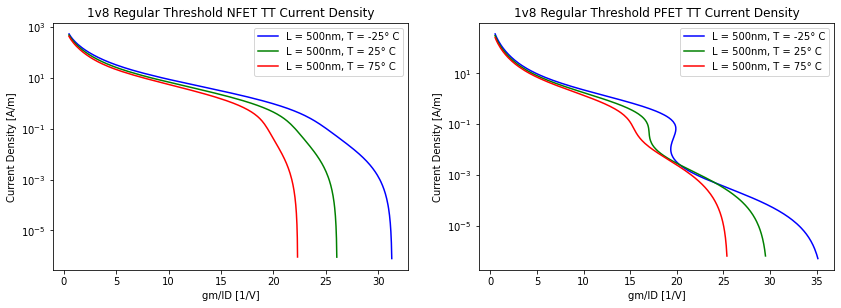

In [18]:
#
# Create graphs and plot current density for NFET and PFET devices with Length = 500n
#

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

nfet_cold.plot_processes_params("kgm", "iden", show_plot=False, new_plot=False, fig1=fig, ax1=ax1, color="blue", legend_str="L = 500nm, T = -25° C")
nfet_nominal.plot_processes_params("kgm", "iden", show_plot=False, new_plot=False, fig1=fig, ax1=ax1, color="green", legend_str="L = 500nm, T = 25° C")
nfet_hot.plot_processes_params("kgm", "iden", show_plot=False, new_plot=False, fig1=fig, ax1=ax1, color="red", legend_str="L = 500nm, T = 75° C")

pfet_cold.plot_processes_params("kgm", "iden", show_plot=False, color="blue", new_plot=False, fig1=fig, ax1=ax2, legend_str="L = 500nm, T = -25° C")
pfet_nominal.plot_processes_params("kgm", "iden", show_plot=False, color="green", new_plot=False, fig1=fig, ax1=ax2, legend_str="L = 500nm, T = 25° C")
pfet_hot.plot_processes_params("kgm", "iden", show_plot=False, color="red", new_plot=False, fig1=fig, ax1=ax2, legend_str="L = 500nm, T = 75° C")

ax1.set_yscale("log")
ax1.set_title("1v8 Regular Threshold NFET TT Current Density")
ax1.set_xlabel("gm/ID [1/V]")
ax1.set_ylabel("Current Density [A/m]")

ax2.set_yscale("log")
ax2.set_title("1v8 Regular Threshold PFET TT Current Density")
ax2.set_xlabel("gm/ID [1/V]")
ax2.set_ylabel("Current Density [A/m]")

plt.show()


**It can be observed in the figure for the PFET current density that the current density exhibits behavior that is not physically possible. This issue is related to Skywater's PFET modeling and is documented here https://github.com/google/skywater-pdk/issues/381. Dr. Borris Murmann, Dr. Harald Pretl, and myself (Alec Adair) have all commented on in September 2022 - my comments are near the end of the thread.**

For proper design using the Skywater130nm-A PDK, PFET gm/ID values of less than about 15 should be used to ensure accurate results.

---


In [19]:

# Function calculates device width from gm/ID values and OTA Specifications
# Returns device widths
def size_ota_devices_from_kgm_and_currents(n_corner, p_corner, kgm_n, kgm_p, gain=50, bw=2e6, cload=4e-12, phase_margin=60):
    gbw = gain*bw
    ninety_minus_pm = 90 - phase_margin
    therm_noise = 500e-9
    tan_pm = math.tan(ninety_minus_pm*math.pi/180)
    alpha = 1/tan_pm
    two_pi_alpha_gbw = 2*math.pi*alpha*gbw
    f2 = alpha*gbw
    total_current, m1_current, m6_current, beta_i_j, kcout_i_j, gain_i_j, thermal_rms_noise_i_j, beta_valid_i_j, gain_valid, thermal_noise_valid, kc_out = total_current_ota(n_corner, p_corner, kgm_n, kgm_p, 
                                                                                                                                                            alpha, gbw, cload, gain_spec=gain, thermal_noise_spec=therm_noise)
    iden1_2 = n_corner.lookup(param1="kgm", param2="iden", param1_val=kgm_n)
    iden3_4 = p_corner.lookup(param1="kgm", param2="iden", param1_val=kgm_p)
    print("")
    #print("NFET Current Density for gm/ID=" + str(kgm_n) + ": " + str(iden1_2) + " A/m")
    #print("PFET Current Density for gm/ID=" + str(kgm_p) + ": " + str(iden3_4) + " A/m")
    print(f"NFET Current Density for gm/ID={kgm_n:.2f}: {iden1_2:.2f} A/m")
    print(f"PFET Current Density for gm/ID={kgm_p:.2f}: {iden3_4:.2f} A/m")
    print("")
    w1_2 = m1_current/iden1_2
    w3_4 = m1_current/iden3_4
    w5_6 = m6_current/iden1_2
    w7_8 = m6_current/iden3_4
    print(f"M1,2 Width: {w1_2*1e6:.2f} um")
    print(f"M3,4 Width: {w3_4*1e6:.2f} um")
    print(f"M5,6 Width: {w5_6*1e6:.2f} um")
    print(f"M7,8 Width: {w7_8*1e6:.2f} um")
    return w1_2, w3_4, w5_6, w7_8

# Example for running sizing function for transistors 
print("Example run of size_ota_devices_from_kgm_and_currents")
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_nominal, pfet_nominal, kgm_n=15, kgm_p=5.255)


Example run of size_ota_devices_from_kgm_and_currents

NFET Current Density for gm/ID=15.00: 2.25 A/m
PFET Current Density for gm/ID=5.25: 7.25 A/m

M1,2 Width: 11.75 um
M3,4 Width: 3.65 um
M5,6 Width: 80.58 um
M7,8 Width: 25.01 um


---
## **Design Choices for Layout**

To achieve a fixed gm/ID value across temperature corners for a fixed bias current, the current density of a device needs to be adjusted accordingly. This can be done by adjusting the width of a device. With a non-programmable layout, device width is fixed and cannot be adjustment cannot be done. For this work a layout is generated for each corner corresponding to the correct current density to achieve the fixed gm/ID values and currents in the design. A rise in temperature corresponds to a lower current density required to achieve a given gm/ID. This lower current density requirement then corresponds to a wider device and larger layout. Further work aims to address analytical and procedural layout and design convergence.

**The ALIGN analog layout generator requires that all devices in a generated design have the same width and an even number of fingers. The minimum finger width for the ALIGN tool is 420 nm, which for an even numer of fingers corresponds to an 840 nm pitch. The ideal widths calculated from current density must be converted into number of fingers for ALIGN.** 



In [20]:
def get_fingers_for_align(w1_2, w3_4, w5_6, w7_8):
    # Define the pitch
    pitch = 420e-9

    # Function to calculate the number of fingers
    def calculate_fingers(width):
        # Calculate the number of fingers
        num_fingers = round(width / pitch)
        # Ensure the number of fingers is even
        if num_fingers % 2 != 0:
            num_fingers += 1
        return num_fingers

    # Calculate the number of fingers for each width
    w1_2_fingers = calculate_fingers(w1_2)
    w3_4_fingers = calculate_fingers(w3_4)
    w5_6_fingers = calculate_fingers(w5_6)
    w7_8_fingers = calculate_fingers(w7_8)
    print("")
    print("M1,2 # of Fingers: " + str(w1_2_fingers))
    print("M3,4 # of Fingers: " + str(w3_4_fingers))
    print("M5,6 # of Fingers: " + str(w5_6_fingers))
    print("M7,8 # of Fingers: " + str(w7_8_fingers))
    return w1_2_fingers, w3_4_fingers, w5_6_fingers, w7_8_fingers

# Example for running sizing function for transistors 
print("Example run of get_fingers_for_align from calculated widths")
f1_2, f3_4, f5_6, f7_8 = get_fingers_for_align(w1_2, w3_4, w5_6, w7_8)


Example run of get_fingers_for_align from calculated widths

M1,2 # of Fingers: 28
M3,4 # of Fingers: 10
M5,6 # of Fingers: 192
M7,8 # of Fingers: 60


---
## **Netlist Generation**

**Create Netlists Each Optimized for The Three Different Temperatures -25°, 25°, and 75° Celsius**

At this stage, netlists for SPICE simulation and ALIGN layout can be generated.


**Spice Netlist Generation**

In the design directory (located at in the same path as this notebook) there is a subdirectory for all simulation data. Within this directory there are three directories spice_-25c, spice_25c, and spice_75c. These directories contain spice testbenches as well as the generated spice netlists.


In [21]:
# Creates SPICE netlist from a netlist template file with the given values for w1_2, w3_4, w5_6, w7_8.
# Replaces placeholders for W1-2, W3-4, W5-6, W7-8 and calculates W9-10 as twice W1-2.
def create_spice_netlist(netlist_template, output_netlist, w1_2, w3_4, w5_6, w7_8):
    # Read the template ALIGN netlist file
    with open(netlist_template, 'r') as file:
        netlist = file.readlines()

    # Convert to micrometers
    w1_2 = w1_2*1e6
    w3_4 = w3_4*1e6
    w5_6 = w5_6*1e6
    w7_8 = w7_8*1e6

    #Round widths to two decimal places
    w1_2 = round(w1_2, 2)
    w3_4 = round(w3_4, 2)
    w5_6 = round(w5_6, 2)
    w7_8 = round(w7_8, 2)
    
    # Calculate NF9-10 as twice NF1-2
    w9_10 = w1_2 * 2

    # Replace placeholders in the netlist template
    updated_netlist = []
    for line in netlist:
        line = line.replace('$W1-2', str(w1_2))
        line = line.replace('$W3-4', str(w3_4))
        line = line.replace('$W5-6', str(w5_6))
        line = line.replace('$W7-8', str(w7_8))
        line = line.replace('$W9-10', str(w9_10))
        updated_netlist.append(line)

    # Write the updated ALIGN netlist to a new file
    with open(output_netlist, 'w') as file:
        file.writelines(updated_netlist)
    print("")
    print("SPICE Netlist output written to " + output_netlist)
    print("--------------")
    print(''.join(updated_netlist))

**SPICE Netlist Generation for -25° Celsius**

In [22]:
# Size OTA Devices using -25° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_cold, pfet_cold, kgm_n=15, kgm_p=5.255)

# Define SPICE netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/simulation/cm_ota_params_template.sp"
spice_netlist = "CM-OTA-Synthesis/design/simulation/spice_-25c/cm_ota_params.sp"

# Generate SPICE netlist for -25° Temperature
create_spice_netlist(netlist_template, spice_netlist, w1_2, w3_4, w5_6, w7_8)



NFET Current Density for gm/ID=15.00: 3.00 A/m
PFET Current Density for gm/ID=5.25: 8.50 A/m

M1,2 Width: 7.49 um
M3,4 Width: 2.64 um
M5,6 Width: 59.49 um
M7,8 Width: 21.00 um

SPICE Netlist output written to CM-OTA-Synthesis/design/simulation/spice_-25c/cm_ota_params.sp
--------------
.param w1_2=7.49
.param w3_4=2.64
.param w5_6=59.49
.param w7_8=21.0
.param w9_10=14.98
.param beta=1
.param nf1_2=1
.param nf3_4=1
.param nf5_6=1
.param nf7_8=1
.param nf9_10=1

.param iref_ideal=65u
.param iref_post_layout=70u



**SPICE Netlist Generation for 25° Celsius**

In [23]:
# Size OTA Devices using 25° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_nominal, pfet_nominal, kgm_n=15, kgm_p=5.255)

# Define SPICE netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/simulation/cm_ota_params_template.sp"
spice_netlist = "CM-OTA-Synthesis/design/simulation/spice_25c/cm_ota_params.sp"

# Generate SPICE netlist for 25° Temperature
create_spice_netlist(netlist_template, spice_netlist, w1_2, w3_4, w5_6, w7_8)



NFET Current Density for gm/ID=15.00: 2.25 A/m
PFET Current Density for gm/ID=5.25: 7.25 A/m

M1,2 Width: 11.75 um
M3,4 Width: 3.65 um
M5,6 Width: 80.58 um
M7,8 Width: 25.01 um

SPICE Netlist output written to CM-OTA-Synthesis/design/simulation/spice_25c/cm_ota_params.sp
--------------
.param w1_2=11.75
.param w3_4=3.65
.param w5_6=80.58
.param w7_8=25.01
.param w9_10=23.5
.param beta=1
.param nf1_2=1
.param nf3_4=1
.param nf5_6=1
.param nf7_8=1
.param nf9_10=1

.param iref_ideal=65u
.param iref_post_layout=70u



**SPICE Netlist Generation for 75° Celsius**

In [24]:
# Size OTA Devices using 75° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_hot, pfet_hot, kgm_n=15, kgm_p=5.255)

# Define SPICE netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/simulation/cm_ota_params_template.sp"
spice_netlist = "CM-OTA-Synthesis/design/simulation/spice_75c/cm_ota_params.sp"

# Generate SPICE netlist for 25° Temperature
create_spice_netlist(netlist_template, spice_netlist, w1_2, w3_4, w5_6, w7_8)



NFET Current Density for gm/ID=15.00: 1.50 A/m
PFET Current Density for gm/ID=5.25: 6.25 A/m

M1,2 Width: 20.70 um
M3,4 Width: 4.97 um
M5,6 Width: 124.44 um
M7,8 Width: 29.88 um

SPICE Netlist output written to CM-OTA-Synthesis/design/simulation/spice_75c/cm_ota_params.sp
--------------
.param w1_2=20.7
.param w3_4=4.97
.param w5_6=124.44
.param w7_8=29.88
.param w9_10=41.4
.param beta=1
.param nf1_2=1
.param nf3_4=1
.param nf5_6=1
.param nf7_8=1
.param nf9_10=1

.param iref_ideal=65u
.param iref_post_layout=70u



---

**ALIGN Netlist Generation**

In the design directory (located at in the same path as this notebook) there are 3 subdirectories called gds_-25c, gds_25c, and gds_75c. These directories each contain a subdirectory cm_ota_align with one more subdirectory align_input. The align_input directory contains the ALIGN inputs files to generate layout for an OTA. ALIGN takes two inputs first, an ALIGN netlist with device sizes and net connections, and second a constraints JSON file to direct placement of cells. The same constraints file is used for all layout generation and is the following.

**ALIGN Constraint File for CM OTA**

**Constraints Explanation**

The first and second constraint sets the power and ground ports for the block to be named vdd and vss.

The third constraint directs the placement engine to ensure symmetry for the transistor pairs in the design in the vertical direction.

The fourth constraint directs the placement engine to do a compact placement around the centered around the middle of the design.

The fifth constraint tells ALIGN that the block is an analog block and not a digital one.




**Definition of function to generate an ALIGN netlist from finger count**

Generate an ALIGN netlist from the OTA ALIGN netlist template in the design directory of this notebook and output to respective gds/cm_ota_align/align_inputs directory.

In [25]:
# Creates ALIGN netlist file with the given values for nf1_2, nf3_4, nf5_6, nf7_8.
# Replaces placeholders for NF1-2, NF3-4, NF5-6, NF7-8 and calculates NF9-10 as twice NF1-2.
# The netlist_template is netlist to e 
def create_align_netlist(netlist_template, output_netlist, nf1_2, nf3_4, nf5_6, nf7_8):
    # Read the template ALIGN netlist file
    with open(netlist_template, 'r') as file:
        netlist = file.readlines()

    # Calculate NF9-10 as twice NF1-2
    nf9_10 = nf1_2 * 2

    # Replace placeholders in the netlist template
    updated_netlist = []
    for line in netlist:
        line = line.replace('$NF1-2', str(nf1_2))
        line = line.replace('$NF3-4', str(nf3_4))
        line = line.replace('$NF5-6', str(nf5_6))
        line = line.replace('$NF7-8', str(nf7_8))
        line = line.replace('$NF9-10', str(nf9_10))
        updated_netlist.append(line)

    # Write the updated ALIGN netlist to a new file
    with open(output_netlist, 'w') as file:
        file.writelines(updated_netlist)
    print("")
    print("ALIGN Netlist output written to " + output_netlist)
    print("--------------")
    print(''.join(updated_netlist))



**ALIGN Netlist Generation for -25° Celsius**

In [26]:
# Size OTA Devices using -25° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_cold, pfet_cold, kgm_n=15, kgm_p=5.255)

# Convert Widths to unit fingers for align
nf1_2, nf3_4, nf5_6, nf7_8 = get_fingers_for_align(w1_2, w3_4, w5_6, w7_8)

# Define ALIGN netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/align_netlist_template.txt"
align_netlist = "CM-OTA-Synthesis/design/gds_-25c/cm_ota_align/align_input/current_mirror_ota.sp"

# Generate ALIGN netlist for -25° Temperature
create_align_netlist(netlist_template, align_netlist, nf1_2, nf3_4, nf5_6, nf7_8)



NFET Current Density for gm/ID=15.00: 3.00 A/m
PFET Current Density for gm/ID=5.25: 8.50 A/m

M1,2 Width: 7.49 um
M3,4 Width: 2.64 um
M5,6 Width: 59.49 um
M7,8 Width: 21.00 um

M1,2 # of Fingers: 18
M3,4 # of Fingers: 6
M5,6 # of Fingers: 142
M7,8 # of Fingers: 50

ALIGN Netlist output written to CM-OTA-Synthesis/design/gds_-25c/cm_ota_align/align_input/current_mirror_ota.sp
--------------
.subckt current_mirror_ota vss vdd vout vinn vinp id
M10 id id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=36
M9 source id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=36
M1 ds1 vinn source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=18
M2 ds2 vinp source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=18
M3 ds1 ds1 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=6
M4 ds2 ds2 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=6
M5 ds3 ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=142
M6 vout ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=142
M7 ds3 

**ALIGN Netlist Generation for 25° Celsius**

In [27]:
# Size OTA Devices using 25° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_nominal, pfet_nominal, kgm_n=15, kgm_p=5.255)

# Convert Widths to unit fingers for align
nf1_2, nf3_4, nf5_6, nf7_8 = get_fingers_for_align(w1_2, w3_4, w5_6, w7_8)

# Define ALIGN netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/align_netlist_template.txt"
align_netlist = "CM-OTA-Synthesis/design/gds_25c/cm_ota_align/align_input/current_mirror_ota.sp"

# Generate ALIGN netlist for -25° Temperature
create_align_netlist(netlist_template, align_netlist, nf1_2, nf3_4, nf5_6, nf7_8)



NFET Current Density for gm/ID=15.00: 2.25 A/m
PFET Current Density for gm/ID=5.25: 7.25 A/m

M1,2 Width: 11.75 um
M3,4 Width: 3.65 um
M5,6 Width: 80.58 um
M7,8 Width: 25.01 um

M1,2 # of Fingers: 28
M3,4 # of Fingers: 10
M5,6 # of Fingers: 192
M7,8 # of Fingers: 60

ALIGN Netlist output written to CM-OTA-Synthesis/design/gds_25c/cm_ota_align/align_input/current_mirror_ota.sp
--------------
.subckt current_mirror_ota vss vdd vout vinn vinp id
M10 id id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=56
M9 source id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=56
M1 ds1 vinn source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=28
M2 ds2 vinp source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=28
M3 ds1 ds1 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=10
M4 ds2 ds2 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=10
M5 ds3 ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=192
M6 vout ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=192
M7 d

**ALIGN Netlist Generation for 75° Celsius**

In [28]:
# Size OTA Devices using 25° C lookup tables with optimized gm/ID values 
w1_2, w3_4, w5_6, w7_8 = size_ota_devices_from_kgm_and_currents(nfet_hot, pfet_hot, kgm_n=15, kgm_p=5.255)

# Convert Widths to unit fingers for align
nf1_2, nf3_4, nf5_6, nf7_8 = get_fingers_for_align(w1_2, w3_4, w5_6, w7_8)

# Define ALIGN netlist template file and output netlist to be generated
netlist_template = "CM-OTA-Synthesis/design/align_netlist_template.txt"
align_netlist = "CM-OTA-Synthesis/design/gds_75c/cm_ota_align/align_input/current_mirror_ota.sp"

# Generate ALIGN netlist for -25° Temperature
create_align_netlist(netlist_template, align_netlist, nf1_2, nf3_4, nf5_6, nf7_8)



NFET Current Density for gm/ID=15.00: 1.50 A/m
PFET Current Density for gm/ID=5.25: 6.25 A/m

M1,2 Width: 20.70 um
M3,4 Width: 4.97 um
M5,6 Width: 124.44 um
M7,8 Width: 29.88 um

M1,2 # of Fingers: 50
M3,4 # of Fingers: 12
M5,6 # of Fingers: 296
M7,8 # of Fingers: 72

ALIGN Netlist output written to CM-OTA-Synthesis/design/gds_75c/cm_ota_align/align_input/current_mirror_ota.sp
--------------
.subckt current_mirror_ota vss vdd vout vinn vinp id
M10 id id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=100
M9 source id vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=100
M1 ds1 vinn source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=50
M2 ds2 vinp source vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=50
M3 ds1 ds1 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=12
M4 ds2 ds2 vdd vdd sky130_fd_pr__pfet_01v8 L=500e-9 w=4.2e-7 nf=12
M5 ds3 ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=296
M6 vout ds3 vss vss sky130_fd_pr__nfet_01v8 L=500e-9 w=4.2e-7 nf=296
M

---
## **Current Mirror Layout Generation With ALIGN**

Call the ALIGN layout generator and generate layouts from the generated netlists.

**GDS outputs are put into the design/gds_TEMPERATURES/cm_ota_align directories**

In [32]:
!schematic2layout.py CM-OTA-Synthesis/design/gds_-25c/cm_ota_align/align_input -p CM-OTA-Synthesis/eda/ALIGN-pdk-sky130/SKY130_PDK/ -w CM-OTA-Synthesis/design/gds_-25c/cm_ota_align

align.main INFO : Reading netlist: /home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_-25c/cm_ota_align/align_input/current_mirror_ota.sp subckt=CURRENT_MIRROR_OTA, flat=0
align.compiler.compiler INFO : Starting topology identification...
align.compiler.user_const INFO : Reading constraint file: [PosixPath('/home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_-25c/cm_ota_align/align_input/current_mirror_ota.const.json')]
align.compiler.compiler INFO : Completed topology identification.
align.pnr.main INFO : Running Place & Route for CURRENT_MIRROR_OTA
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.placer INFO : Starting bottom-up placement on CURRENT_MIRROR_OTA 0
PnR.placer.Placer.Place

In [12]:
!schematic2layout.py CM-OTA-Synthesis/design/gds_25c/cm_ota_align/align_input -p CM-OTA-Synthesis/eda/ALIGN-pdk-sky130/SKY130_PDK/ -w CM-OTA-Synthesis/design/gds_25c/cm_ota_align

align.main INFO : Reading netlist: /home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_25c/cm_ota_align/align_input/current_mirror_ota.sp subckt=CURRENT_MIRROR_OTA, flat=0
align.compiler.compiler INFO : Starting topology identification...
align.compiler.user_const INFO : Reading constraint file: [PosixPath('/home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_25c/cm_ota_align/align_input/current_mirror_ota.const.json')]
align.compiler.compiler INFO : Completed topology identification.
align.pnr.main INFO : Running Place & Route for CURRENT_MIRROR_OTA
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.placer INFO : Starting bottom-up placement on CURRENT_MIRROR_OTA 0
PnR.placer.Placer.Placeme

In [44]:
!schematic2layout.py CM-OTA-Synthesis/design/gds_75c/cm_ota_align/align_input -p CM-OTA-Synthesis/eda/ALIGN-pdk-sky130/SKY130_PDK/ -w CM-OTA-Synthesis/design/gds_75c/cm_ota_align

align.main INFO : Reading netlist: /home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_75c/cm_ota_align/align_input/current_mirror_ota.sp subckt=CURRENT_MIRROR_OTA, flat=0
align.compiler.compiler INFO : Starting topology identification...
align.compiler.user_const INFO : Reading constraint file: [PosixPath('/home/adair/Documents/CAD/sscs-ose-code-a-chip.github.io/ISSCC25/submitted_notebooks/current_mirror_ota_optimization/design/gds_75c/cm_ota_align/align_input/current_mirror_ota.const.json')]
align.compiler.compiler INFO : Completed topology identification.
align.pnr.main INFO : Running Place & Route for CURRENT_MIRROR_OTA
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.build_pnr_model INFO : Reading contraint json file CURRENT_MIRROR_OTA.pnr.const.json
align.pnr.placer INFO : Starting bottom-up placement on CURRENT_MIRROR_OTA 0
PnR.placer.Placer.Placeme

## **GDS Renderings**

<img src="images/fig_cm_ota_all_gds.png" alt="GDS" style="width: 85%; display: block; margin: auto;">

The three GDS renderings are for  -25°, 25°, and 75° C generations from left to right.

---
## **Physical Verification and Layout Extraction**

Use the magic layout tool to run netlist extraction on the three layouts.

In [1]:
# Run magic with extraction script for -25° C layout
# Output shows errors - need to investigate, but extraction does run.
!magic -dnull -noconsole CM-OTA-Synthesis/design/gds_-25c/extract_current_mirror_ota.tcl
# move results to respective directory
!mv -f *.ext CM-OTA-Synthesis/design/gds_-25c
!mv -f *.spice CM-OTA-Synthesis/design/gds_-25c


Magic 8.3 revision 432 - Compiled on su 24.9.2023 15.09.29 +0300.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "design/gds_-25c/extract_current_mirror_ota.tcl" from command line.
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style default: scaleFactor=1, multiplier=1
The following types are not handled by extraction and will be treated as non-electrical types:
    NWELL NWELLT NWELLP DNWELL DIFF TAP LVTN HVTP HVI TUNM POLY POLYP POLYT NPC PSDM NSDM LICON1 LI1 LI1T LI1P MCON MET1 MET1T MET1P VIA1 MET2 MET2T MET2P VIA2 MET3 MET3T MET3P VIA3 MET4 MET4T MET4P VIA4 MET5 MET5T MET5P PAD PADT PADP AREAID TEXT HVTR NCM RPM NSM RDL VHVI LDNTM HVNTM PMM PNP CAP IND PWRES POLYRES DIFFRES DIODE POLYM COREID PWELLT PWELLP CFOMDROP CLI1MADD CNTMADD CP1MADD BOUND RERAM 
Scaled tech values by 2 / 1 to match internal grid scaling
Input style sky130(): scaleFactor

In [2]:
# Run magic with extraction script for 25° C layout
# Output shows errors - need to investigate, but extraction does run.
!magic -dnull -noconsole CM-OTA-Synthesis/design/gds_25c/extract_current_mirror_ota.tcl
# move results to respective directory
!mv -f *.ext CM-OTA-Synthesis/design/gds_25c
!mv -f *.spice CM-OTA-Synthesis/design/gds_25c


Magic 8.3 revision 432 - Compiled on su 24.9.2023 15.09.29 +0300.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "design/gds_25c/extract_current_mirror_ota.tcl" from command line.
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style default: scaleFactor=1, multiplier=1
The following types are not handled by extraction and will be treated as non-electrical types:
    NWELL NWELLT NWELLP DNWELL DIFF TAP LVTN HVTP HVI TUNM POLY POLYP POLYT NPC PSDM NSDM LICON1 LI1 LI1T LI1P MCON MET1 MET1T MET1P VIA1 MET2 MET2T MET2P VIA2 MET3 MET3T MET3P VIA3 MET4 MET4T MET4P VIA4 MET5 MET5T MET5P PAD PADT PADP AREAID TEXT HVTR NCM RPM NSM RDL VHVI LDNTM HVNTM PMM PNP CAP IND PWRES POLYRES DIFFRES DIODE POLYM COREID PWELLT PWELLP CFOMDROP CLI1MADD CNTMADD CP1MADD BOUND RERAM 
Scaled tech values by 2 / 1 to match internal grid scaling
Input style sky130(): scaleFactor=

In [3]:
# Run magic with extraction script for 75° C layout
# Output shows errors - need to investigate, but extraction does run.
!magic -dnull -noconsole CM-OTA-Synthesis/design/gds_75c/extract_current_mirror_ota.tcl
# move results to respective directory
!mv -f *.ext CM-OTA-Synthesis/design/gds_75c
!mv -f *.spice CM-OTA-Synthesis/design/gds_75c


Magic 8.3 revision 432 - Compiled on su 24.9.2023 15.09.29 +0300.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "design/gds_75c/extract_current_mirror_ota.tcl" from command line.
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style default: scaleFactor=1, multiplier=1
The following types are not handled by extraction and will be treated as non-electrical types:
    NWELL NWELLT NWELLP DNWELL DIFF TAP LVTN HVTP HVI TUNM POLY POLYP POLYT NPC PSDM NSDM LICON1 LI1 LI1T LI1P MCON MET1 MET1T MET1P VIA1 MET2 MET2T MET2P VIA2 MET3 MET3T MET3P VIA3 MET4 MET4T MET4P VIA4 MET5 MET5T MET5P PAD PADT PADP AREAID TEXT HVTR NCM RPM NSM RDL VHVI LDNTM HVNTM PMM PNP CAP IND PWRES POLYRES DIFFRES DIODE POLYM COREID PWELLT PWELLP CFOMDROP CLI1MADD CNTMADD CP1MADD BOUND RERAM 
Scaled tech values by 2 / 1 to match internal grid scaling
Input style sky130(): scaleFactor=

**Magic does not add subckt definitions to the netlists generated and must be added.**

In [22]:
# Generated extractions do contain subckt definitons
def make_subckt_from_extraction(input_file_path, output_file_path):
    subckt_declaration = ".subckt cm_ota_extracted ID VOUT VINN VINP VSS VDD\n"
    subckt_end = ".ends\n"
    try:
        with open(input_file_path, 'r') as input_file:
            lines = input_file.readlines()
        
        # Remove all occurrences of string " **FLOATING"
        modified_lines = [line.replace(" **FLOATING", "") for line in lines]
        
        # Add subcircuit declaration at the top and ".ends" at the bottom
        modified_lines.insert(0, subckt_declaration)  # Add at the beginning
        modified_lines.append(subckt_end)  # Add at the end

        # Write the modified content to the output file
        with open(output_file_path, 'w') as output_file:
            output_file.writelines(modified_lines)
        
        print(f"Extracted netlist created and written to {output_file_path}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

In [37]:
make_subckt_from_extraction("CM-OTA-Synthesis/design/gds_-25c/CURRENT_MIRROR_OTA_0.spice", "CM-OTA-Synthesis/design/simulation/spice_-25c/cm_ota_extracted.sp")
make_subckt_from_extraction("CM-OTA-Synthesis/design/gds_25c/CURRENT_MIRROR_OTA_0.spice", "CM-OTA-Synthesis/design/simulation/spice_25c/cm_ota_extracted.sp")
make_subckt_from_extraction("CM-OTA-Synthesis/design/gds_75c/CURRENT_MIRROR_OTA_0.spice", "CM-OTA-Synthesis/design/simulation/spice_75c/cm_ota_extracted.sp")

Extracted netlist created and written to design/simulation/spice_-25c/cm_ota_extracted.sp
Extracted netlist created and written to design/simulation/spice_25c/cm_ota_extracted.sp
Extracted netlist created and written to design/simulation/spice_75c/cm_ota_extracted.sp


## **Run Simulations using ngspice**
**Run DC and AC simulations using ngspice**

In [24]:
import os
# Function for pre-processing spice testbench/netlist
# ngspice cannot handle $PDK_ROOT variable
def replace_pdk_root(input_file_path, output_file_path):
    # Get the value of the PDK_ROOT environment variable
    pdk_root_value = os.getenv('PDK_ROOT')
    if not pdk_root_value:
        raise EnvironmentError("Environment variable PDK_ROOT is not set.")
    try:
        # Read the input file
        with open(input_file_path, 'r') as input_file:
            content = input_file.read()
        # Replace all occurrences of $PDK_ROOT with the environment variable value
        modified_content = content.replace('$PDK_ROOT', pdk_root_value)
        # Write the modified content to the output file
        with open(output_file_path, 'w') as output_file:
            output_file.write(modified_content)
        print(f"Successfully replaced $PDK_ROOT and wrote to {output_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


In [29]:
replace_pdk_root("CM-OTA-Synthesis/design/simulation/spice_-25c/tb_cm_ota.sp", "tb_cm_ota_-25c.sp")
!ngspice -b tb_cm_ota_-25c.sp
!rm tb_cm_ota_-25c.sp
!mv -f ac_output_ext.txt CM-OTA-Synthesis/design/simulations/spice_-25c
!mv -f ac_output.txt CM-OTA-Synthesis/design/simulations/spice_-25c

Successfully replaced $PDK_ROOT and wrote to tb_cm_ota_-25c.sp

No compatibility mode selected!


Circuit: 

^C


mv: cannot move 'ac_output_ext.txt' to 'design/simulations/spice_-25c': No such file or directory
mv: cannot move 'ac_output.txt' to 'design/simulations/spice_-25c': No such file or directory


In [26]:
replace_pdk_root("CM-OTA-Synthesis/design/simulation/spice_25c/tb_cm_ota.sp", "tb_cm_ota_25c.sp")
!ngspice -b tb_cm_ota_25c.sp
!rm tb_cm_ota_25c.sp
!mv -f ac_output_ext.txt CM-OTA-Synthesis/design/simulations/spice_25c
!mv -f ac_output.txt CM-OTA-Synthesis/design/simulations/spice_25c

Successfully replaced $PDK_ROOT and wrote to tb_cm_ota_25c.sp
^C


mv: cannot move 'ac_output_ext.txt' to 'design/simulations/spice_25c': No such file or directory
mv: cannot move 'ac_output.txt' to 'design/simulations/spice_25c': No such file or directory


In [27]:
replace_pdk_root("CM-OTA-Synthesis/design/simulation/spice_75c/tb_cm_ota.sp", "tb_cm_ota_75c.sp")
!ngspice -b tb_cm_ota_75c.sp
!rm tb_cm_ota_75c.sp
!mv -f ac_output_ext.txt CM-OTA-Synthesis/design/simulations/spice_75c
!mv -f ac_output.txt CM-OTA-Synthesis/design/simulations/spice_75c

Successfully replaced $PDK_ROOT and wrote to tb_cm_ota_75c.sp
^C


mv: cannot move 'ac_output_ext.txt' to 'design/simulations/spice_75c': No such file or directory
mv: cannot move 'ac_output.txt' to 'design/simulations/spice_75c': No such file or directory


---
## **Ideal SPICE and Post Layout Simulation Results and Comparsion**

DC Gain -25° C ideal: 35.1779245dB
Gain Bandwidth Product -25° C ideal: 95.49925859999999 MHz
Phase Margin -25° C ideal: 73.60160509095546°

DC Gain -25° C Post Layout: 35.5316726dB
Gain Bandwidth Product -25° C Post Layout: 104.712855 MHz
Phase Margin -25° C Post Layout: 61.77066088578317°

DC Gain 25° C ideal: 38.8797188dB
Gain Bandwidth Product 25° C ideal: 102.329299 MHz
Phase Margin 25° C ideal: 69.35725807646786°

DC Gain 25° C Post Layout: 35.3649017dB
Gain Bandwidth Product 25° C Post Layout: 93.32543009999999 MHz
Phase Margin 25° C Post Layout: 63.70963314338616°

DC Gain 75° C ideal: 37.3950306dB
Gain Bandwidth Product 75° C ideal: 100.0 MHz
Phase Margin 75° C ideal: 65.00558346188076°

DC Gain 75° C Post Layout: 34.8598709dB
Gain Bandwidth Product 75° C Post Layout: 87.096359 MHz
Phase Margin 75° C Post Layout: 64.20047691915002°



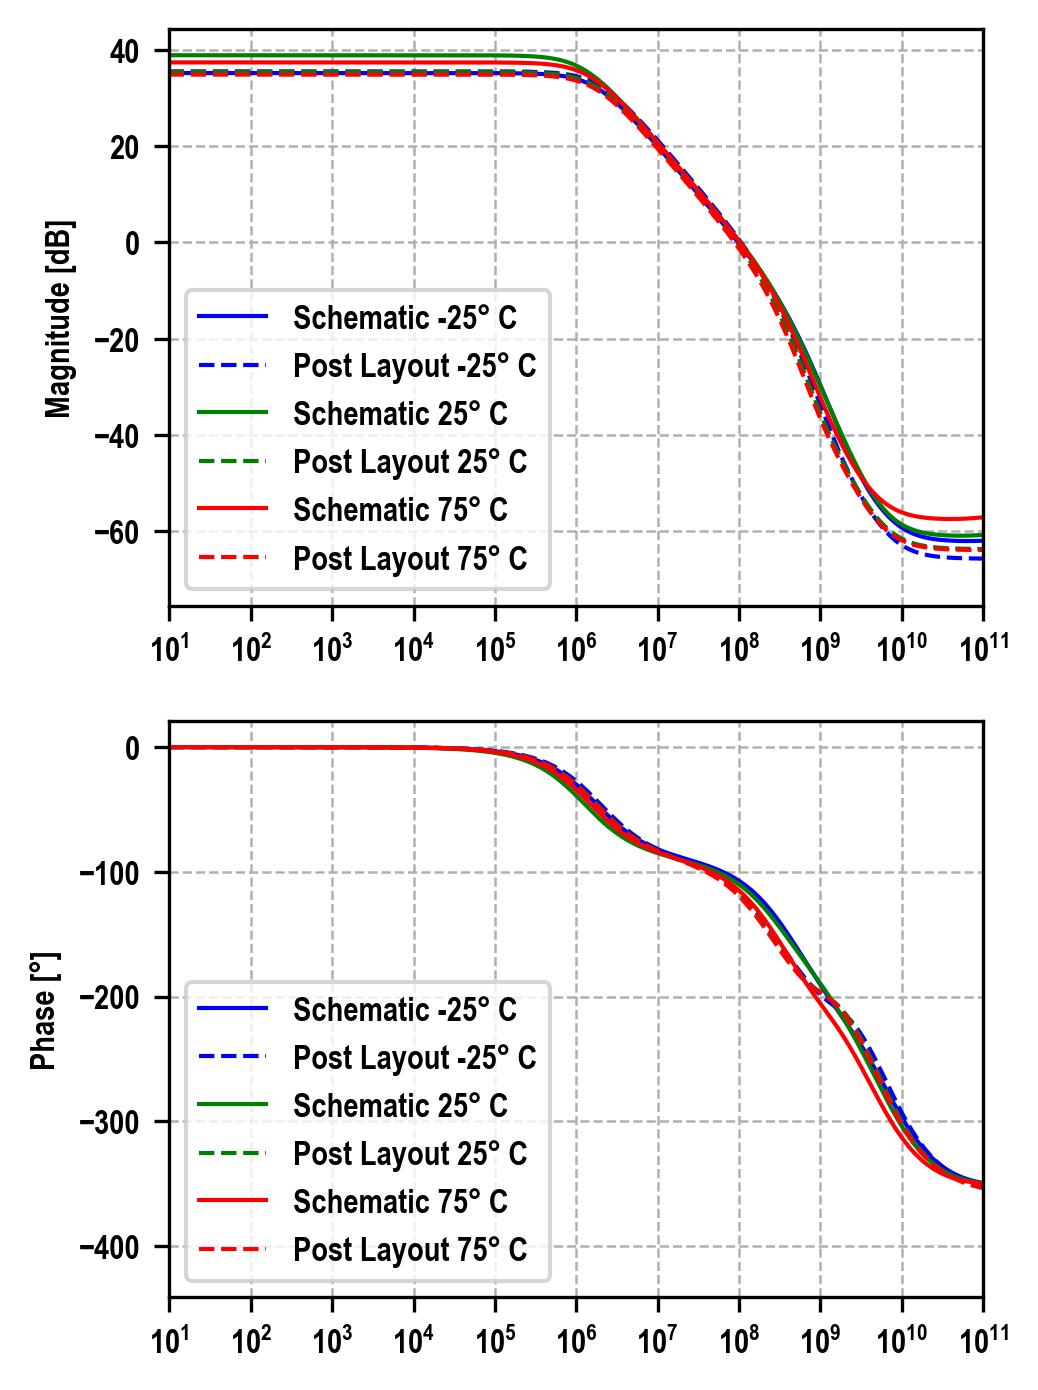

In [29]:
def plot_ac_results(frequency, magnitude_db, phase_deg, line_style, line_color, label_suffix="", fig=None, ax1=None, ax2=None):
    # Define font path and size within the function
    arial_font = "src/fonts/ArialNarrow/arialnarrow_bold.ttf"
    font_size = 8  # Adjust font size for labels, ticks, etc.
    font_properties = FontProperties(fname=arial_font, size=font_size)
    ideal = False
    # Create the figure and axes if not provided (for the first call)
    if fig is None or ax1 is None or ax2 is None:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.5, 2.8 * 2), dpi=300)
        #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 11), dpi=350)
        ideal = True

    # Find the relevant points
    dc_gain, pole_1, pole_2, unity_gain_freq = find_relevant_points(frequency, magnitude_db, phase_deg)
    ax1.plot(frequency, magnitude_db, linestyle=line_style, color=line_color, label=f'{label_suffix}', linewidth=1)

    # Annotate the DC Gain at 100 Hz with a bubble
    magnitude_100Hz = np.interp(100, frequency, magnitude_db)
    # Plot phase in degrees (Ideal or Extracted)

    ax2.plot(frequency, phase_deg, linestyle=line_style, color=line_color, label=f'{label_suffix}', linewidth=1)
    # Annotate the phase margin at the unity gain frequency
    if unity_gain_freq is not None:
        phase_at_unity = np.interp(unity_gain_freq, frequency, phase_deg)  # Phase at unity gain frequency
        phase_margin = 180 + phase_at_unity  # Phase margin calculation
        #ax2.plot(unity_gain_freq, phase_at_unity, 'ko', markersize=6)  # Mark point at unity gain frequency
        #ax2.annotate(f'{label_suffix} Phase: {phase_at_unity:.1f}°\nPhase Margin: {phase_margin:.1f}°',
        #             xy=(unity_gain_freq, phase_at_unity),
        #             xytext=(unity_gain_freq * 1.2, phase_at_unity - 10),
        #             fontsize=font_size, fontproperties=font_properties, ha='left',
        #             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"))

    return fig, ax1, ax2, dc_gain, unity_gain_freq, phase_margin

# Function to read the AC simulation data
def read_ac_simulation_data(filename):
    # Read the data file
    data = np.loadtxt(filename, skiprows=1)  # Skip the header row

    # The file format is expected to be: frequency vdb(2) vp(2)
    frequency = data[:, 0]
    magnitude_db = data[:, 4]
    phase_deg = (180/math.pi)*data[:, 6]

    return frequency, magnitude_db, phase_deg

# Function to find relevant points (DC Gain, Pole 1, Pole 2, Unity Gain Frequency)
def find_relevant_points(frequency, magnitude_db, phase_deg):
    # DC Gain: the magnitude at the lowest frequency (0 Hz or close to it)
    dc_gain = magnitude_db[0]
    # Unity Gain Frequency: the frequency where magnitude crosses 0 dB
    unity_gain_freq = None
    for i in range(len(magnitude_db) - 1):
        if magnitude_db[i] > 0 and magnitude_db[i + 1] < 0:
            unity_gain_freq = frequency[i]
            break
    # Poles: Find where phase crosses -45 degrees (Pole 1) and -135 degrees (Pole 2)
    pole_1 = None
    pole_2 = None
    for i in range(1, len(phase_deg)):
        if phase_deg[i] <= -45 and pole_1 is None:
            pole_1 = frequency[i]  # Approximate the frequency where phase crosses -45 degrees
        elif phase_deg[i] <= -135 and pole_2 is None:
            pole_2 = frequency[i]  # Approximate the frequency where phase crosses -135 degrees
            break
    return dc_gain, pole_1, pole_2, unity_gain_freq


# Function to calculate percentage difference between two values
def percentage_difference_two_values(value1, value2):
    return 100 * (value2 - value1) / value1

def percentage_difference(values):
    if not values:
        return 0
    # Calculate the mean of the values
    mean_value = sum(values) / len(values)
    # Calculate the percentage difference for each value
    percentage_differences = [(value - mean_value) / mean_value * 100 for value in values]
    # Return the average of the percentage differences
    return sum(percentage_differences) / len(percentage_differences)

# Main function to execute the script and handle comparison
#def plot_spice_results():
arial_font = "CM-OTA-Synthesis/src/fonts/ArialNarrow/arialnarrow_bold.ttf"
font_size = 8
arial_bold = FontProperties(fname=arial_font, size=font_size)
font_properties = arial_bold
# Read ideal simulation data

dc_gains = []
unity_gains = []
phase_margins = []

    # Read extracted simulation data
file_neg25_sch = 'CM-OTA-Synthesis/design/simulation/golden_sims/neg_25/ac_output.txt'
freq_neg25_sch, mag_neg25_sch, phase_neg25_sch = read_ac_simulation_data(file_neg25_sch)
# Plot extracted results and pass in the figure and axes from the ideal plot
line_style = "-"
line_color="blue"

fig, ax1, ax2, dc_gain_ext, unity_gain_ext, phase_margin_ext = plot_ac_results(
    freq_neg25_sch, mag_neg25_sch, phase_neg25_sch, line_style, line_color, label_suffix="Schematic -25° C"
)
dc_gains.append(dc_gain_ext)
unity_gains.append(unity_gain_ext)
phase_margins.append(phase_margin_ext)
print("DC Gain -25° C ideal: " + str(dc_gain_ext) + "dB")
print("Gain Bandwidth Product -25° C ideal: " + str(unity_gain_ext/1e6) + " MHz")
print("Phase Margin -25° C ideal: " + str(phase_margin_ext) + "°")
print("")

file_neg25_ext = 'CM-OTA-Synthesis/design/simulation/golden_sims/neg_25/ac_output_ext.txt'
freq_neg25_ext, mag_neg25_ext, phase_neg25_ext = read_ac_simulation_data(file_neg25_ext)
# Plot extracted results and pass in the figure and axes from the ideal plot
line_style = "--"
line_color="blue"
fig, ax1, ax2, dc_gain_ext, unity_gain_ext, phase_margin_ext = plot_ac_results(
    freq_neg25_ext, mag_neg25_ext, phase_neg25_ext, line_style, line_color, label_suffix="Post Layout -25° C", fig=fig, ax1=ax1, ax2=ax2
)
dc_gains.append(dc_gain_ext)
unity_gains.append(unity_gain_ext)
phase_margins.append(phase_margin_ext)

print("DC Gain -25° C Post Layout: " + str(dc_gain_ext) + "dB")
print("Gain Bandwidth Product -25° C Post Layout: " + str(unity_gain_ext/(1e6)) + " MHz")
print("Phase Margin -25° C Post Layout: " + str(phase_margin_ext) + "°")
print("")


filename = 'CM-OTA-Synthesis/design/simulation/golden_sims/25/ac_output.txt'
frequency, magnitude_db, phase_deg = read_ac_simulation_data(filename)
line_style = '-'
line_color = "green"
# Plot ideal results
fig, ax1, ax2, dc_gain_ideal, unity_gain_ideal, phase_margin_ideal = plot_ac_results(
    frequency, magnitude_db, phase_deg, line_style, line_color, label_suffix="Schematic 25° C",  fig=fig, ax1=ax1, ax2=ax2
)
dc_gains.append(dc_gain_ideal)
unity_gains.append(unity_gain_ideal)
phase_margins.append(phase_margin_ideal)

print("DC Gain 25° C ideal: " + str(dc_gain_ideal) + "dB")
print("Gain Bandwidth Product 25° C ideal: " + str(unity_gain_ideal/(1e6)) + " MHz")
print("Phase Margin 25° C ideal: " + str(phase_margin_ideal) + "°")
print("")

file_25_ext = 'CM-OTA-Synthesis/design/simulation/golden_sims/25/ac_output_ext.txt'
freq_25_ext, mag_25_ext, phase_25_ext = read_ac_simulation_data(file_25_ext)


# Plot extracted results and pass in the figure and axes from the ideal plot
line_style = "--"
line_color="green"
fig, ax1, ax2, dc_gain_ext, unity_gain_ext, phase_margin_ext = plot_ac_results(
                             freq_25_ext, mag_25_ext, phase_25_ext, line_style, line_color, label_suffix="Post Layout 25° C", fig=fig, ax1=ax1, ax2=ax2
)
dc_gains.append(dc_gain_ext)
unity_gains.append(unity_gain_ext)
phase_margins.append(phase_margin_ext)

print("DC Gain 25° C Post Layout: " + str(dc_gain_ext) + "dB")
print("Gain Bandwidth Product 25° C Post Layout: " + str(unity_gain_ext/1e6) + " MHz")
print("Phase Margin 25° C Post Layout: " + str(phase_margin_ext) + "°")
print("")



file_75_ext = 'CM-OTA-Synthesis/design/simulation/golden_sims/75/ac_output.txt'
freq_75_ext, mag_75_ext, phase_75_ext = read_ac_simulation_data(file_75_ext)
# Plot extracted results and pass in the figure and axes from the ideal plot
line_style = "-"
line_color="red"
fig, ax1, ax2, dc_gain_ext, unity_gain_ext, phase_margin_ext = plot_ac_results(
    freq_75_ext, mag_75_ext, phase_75_ext, line_style, line_color, label_suffix="Schematic 75° C", fig=fig, ax1=ax1, ax2=ax2
)
dc_gains.append(dc_gain_ext)
unity_gains.append(unity_gain_ext)
phase_margins.append(phase_margin_ext)

print("DC Gain 75° C ideal: " + str(dc_gain_ext) + "dB")
print("Gain Bandwidth Product 75° C ideal: " + str(unity_gain_ext/1e6) + " MHz")
print("Phase Margin 75° C ideal: " + str(phase_margin_ext) + "°")
print("")

# Calculate percentage differences and annotate them
dc_gain_diff = percentage_difference(dc_gains)
unity_gain_diff = percentage_difference(unity_gains)
phase_margin_diff = percentage_difference(phase_margins)

file_75_ext = 'CM-OTA-Synthesis/design/simulation/golden_sims/75/ac_output_ext.txt'
freq_75_ext, mag_75_ext, phase_75_ext = read_ac_simulation_data(file_75_ext)
# Plot extracted results and pass in the figure and axes from the ideal plot
line_style = "--"
line_color="red"
fig, ax1, ax2, dc_gain_ext, unity_gain_ext, phase_margin_ext = plot_ac_results(
    freq_75_ext, mag_75_ext, phase_75_ext, line_style, line_color, label_suffix="Post Layout 75° C", fig=fig, ax1=ax1, ax2=ax2
)
dc_gains.append(dc_gain_ext)
unity_gains.append(unity_gain_ext)
phase_margins.append(phase_margin_ext)

print("DC Gain 75° C Post Layout: " + str(dc_gain_ext) + "dB")
print("Gain Bandwidth Product 75° C Post Layout: " + str(unity_gain_ext/1e6) + " MHz")
print("Phase Margin 75° C Post Layout: " + str(phase_margin_ext) + "°")
print("")

# Calculate percentage differences and annotate them
dc_gain_diff = percentage_difference(dc_gains)
unity_gain_diff = percentage_difference(unity_gains)
phase_margin_diff = percentage_difference(phase_margins)

for label in ax1.get_xticklabels():
    label.set_fontproperties(arial_bold)
for label in ax1.get_yticklabels():
    label.set_fontproperties(arial_bold)
minor_size = font_size - 2
ax1.set_xscale('log')
ax1.set_ylabel('Magnitude [dB]', fontproperties=font_properties)
ax1.grid(which='both', linestyle='--', linewidth=0.6)
ax1.xaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax1.set_xlim(10, 1e11)

ax1.tick_params(labelsize=font_size)
ax2.set_xscale('log')
ax2.set_ylabel('Phase [°]', fontproperties=font_properties)
ax2.grid(which='both', linestyle='--', linewidth=0.6)
ax2.xaxis.set_major_locator(LogLocator(base=10.0, numticks=12))

ax2.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax2.set_xlim(10, 1e11)
ax2.tick_params(labelsize=font_size)


for label in ax2.get_xticklabels():
    label.set_fontproperties(arial_bold)
for label in ax2.get_yticklabels():
    label.set_fontproperties(arial_bold)
minor_size = font_size - 2
ax2.tick_params(axis='both', which='major', labelsize=font_size)



#ax1.tick_params(axis='both', which='minor', labelsize=minor_size)
ax1.legend(prop=arial_bold)
ax2.legend(prop=arial_bold)
plt.grid(True)
plt.savefig("images/ac_simulation_plot.svg", format="svg")
plt.savefig("images/ac_simulation_plot.png", format="png", dpi=300)
#plt.show()

## **Bode Plots**

<img src="images/ac_simulation_plot.png" alt="png" style="width: 75%; display: block; margin: auto;">